In [2]:
import scvi
import scanpy as sc
from sklearn.preprocessing import MinMaxScaler
import matplotlib

# Integration scANVI

In [3]:
target2 = sc.read_h5ad("/vol/data/ouologuems/data/preprocessed/target2_spherized_woSource9.h5ad")
target2

/vol/data/ouologuems/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 50376 × 601
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'SMILES_original', 'SMILES_standardized', 'InChI_standardized', 'InChIKey_standardized', 'broad_sample', 'InChIKey', 'pert_iname', 'pubchem_cid', 'target', 'pert_type', 'control_type', 'moa'
    uns: 'Metadata_Source_colors', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


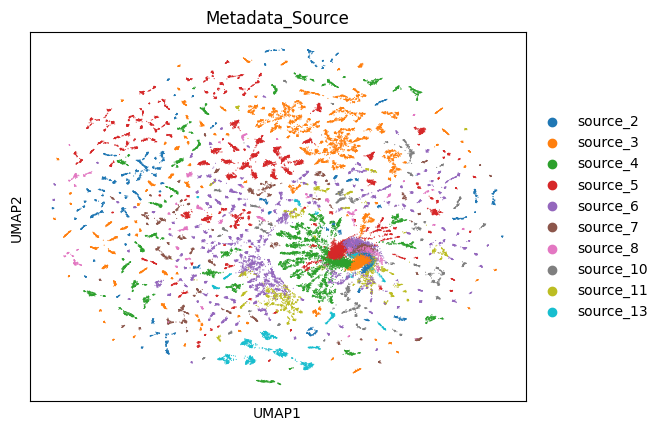

In [4]:
sc.pl.umap(target2, color = "Metadata_Source")

## 1. Integration directly by plate

In [5]:
target2_plate = target2.copy()
# min-max scaling because else you get exploding gradients
scaler = MinMaxScaler()
target2_plate.X = scaler.fit_transform(target2_plate.X)
#target2_plate.layers["counts"] = target2_plate.X

In [6]:
scvi.model.SCANVI.setup_anndata(target2_plate, batch_key="Metadata_Plate", labels_key="Metadata_JCP2022", unlabeled_category="NA")
model = scvi.model.SCANVI(target2_plate, gene_likelihood="normal")
model.train()
SCANVI_LATENT_KEY = "X_scanvi"
target2_plate.obsm[SCANVI_LATENT_KEY] = model.get_latent_representation()

/vol/data/ouologuems/miniconda3/envs/gaushvi/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


INFO     Training for 159 epochs.                                                                                  


/vol/data/ouologuems/scvi-tools/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/vol/data/ouologuems/miniconda3/envs/gaushvi/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=27` in the `DataLoader` to improve performance.


Epoch 159/159: 100%|██████████| 159/159 [1:57:29<00:00, 44.69s/it, v_num=1, train_loss_step=-1.4e+3, train_loss_epoch=-1.46e+3] 

`Trainer.fit` stopped: `max_epochs=159` reached.


Epoch 159/159: 100%|██████████| 159/159 [1:57:29<00:00, 44.33s/it, v_num=1, train_loss_step=-1.4e+3, train_loss_epoch=-1.46e+3]


/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


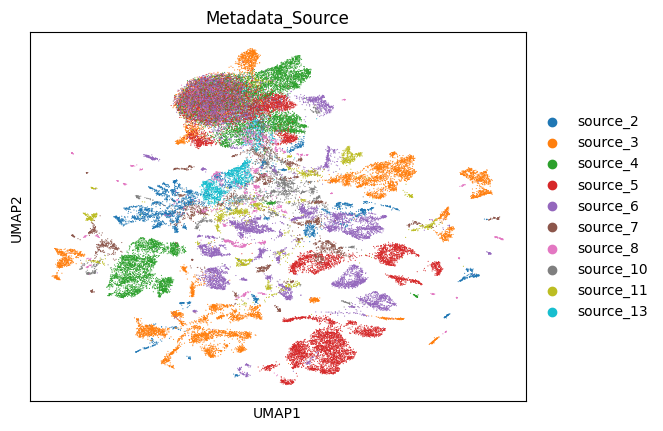

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


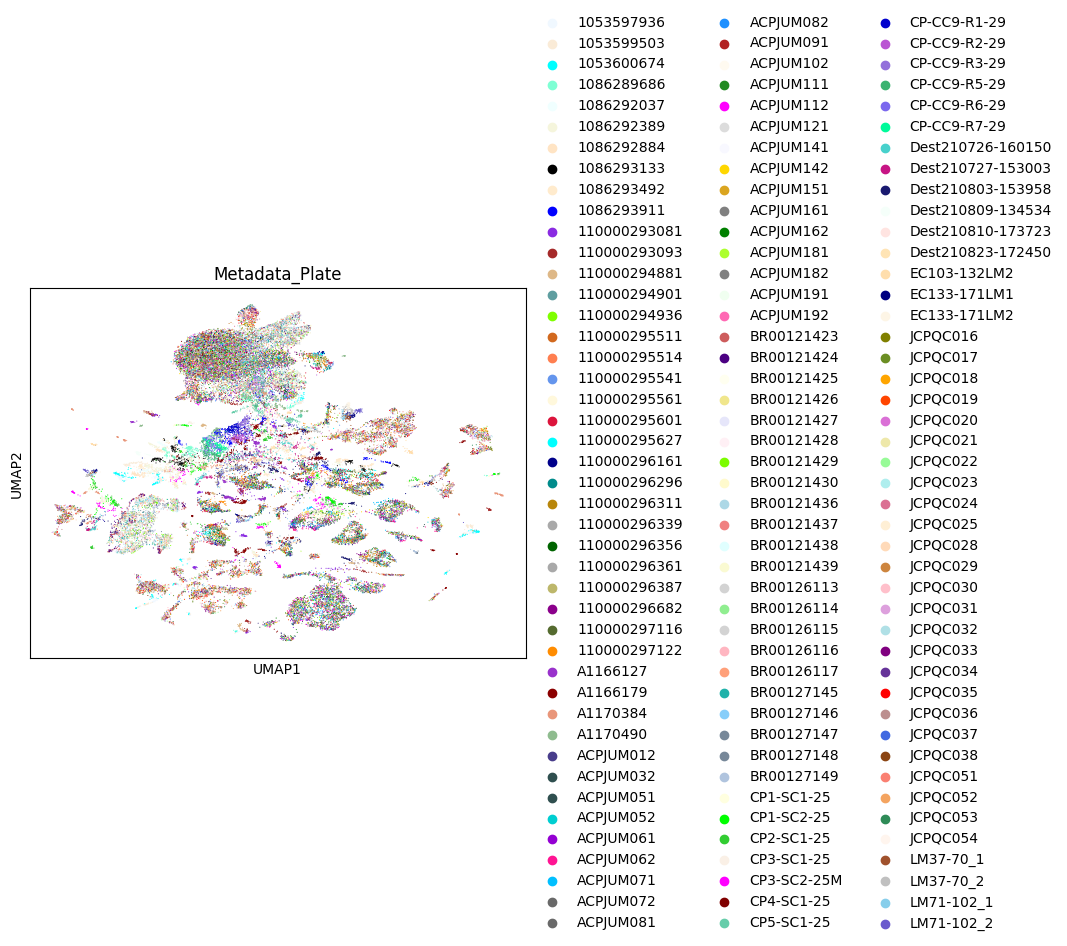

In [7]:
sc.pp.neighbors(target2_plate, use_rep="X_scanvi")
sc.tl.umap(target2_plate)
sc.pl.umap(target2_plate, color="Metadata_Source")
sc.pl.umap(target2_plate, color="Metadata_Plate",palette=list(matplotlib.colors.CSS4_COLORS.values()))

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


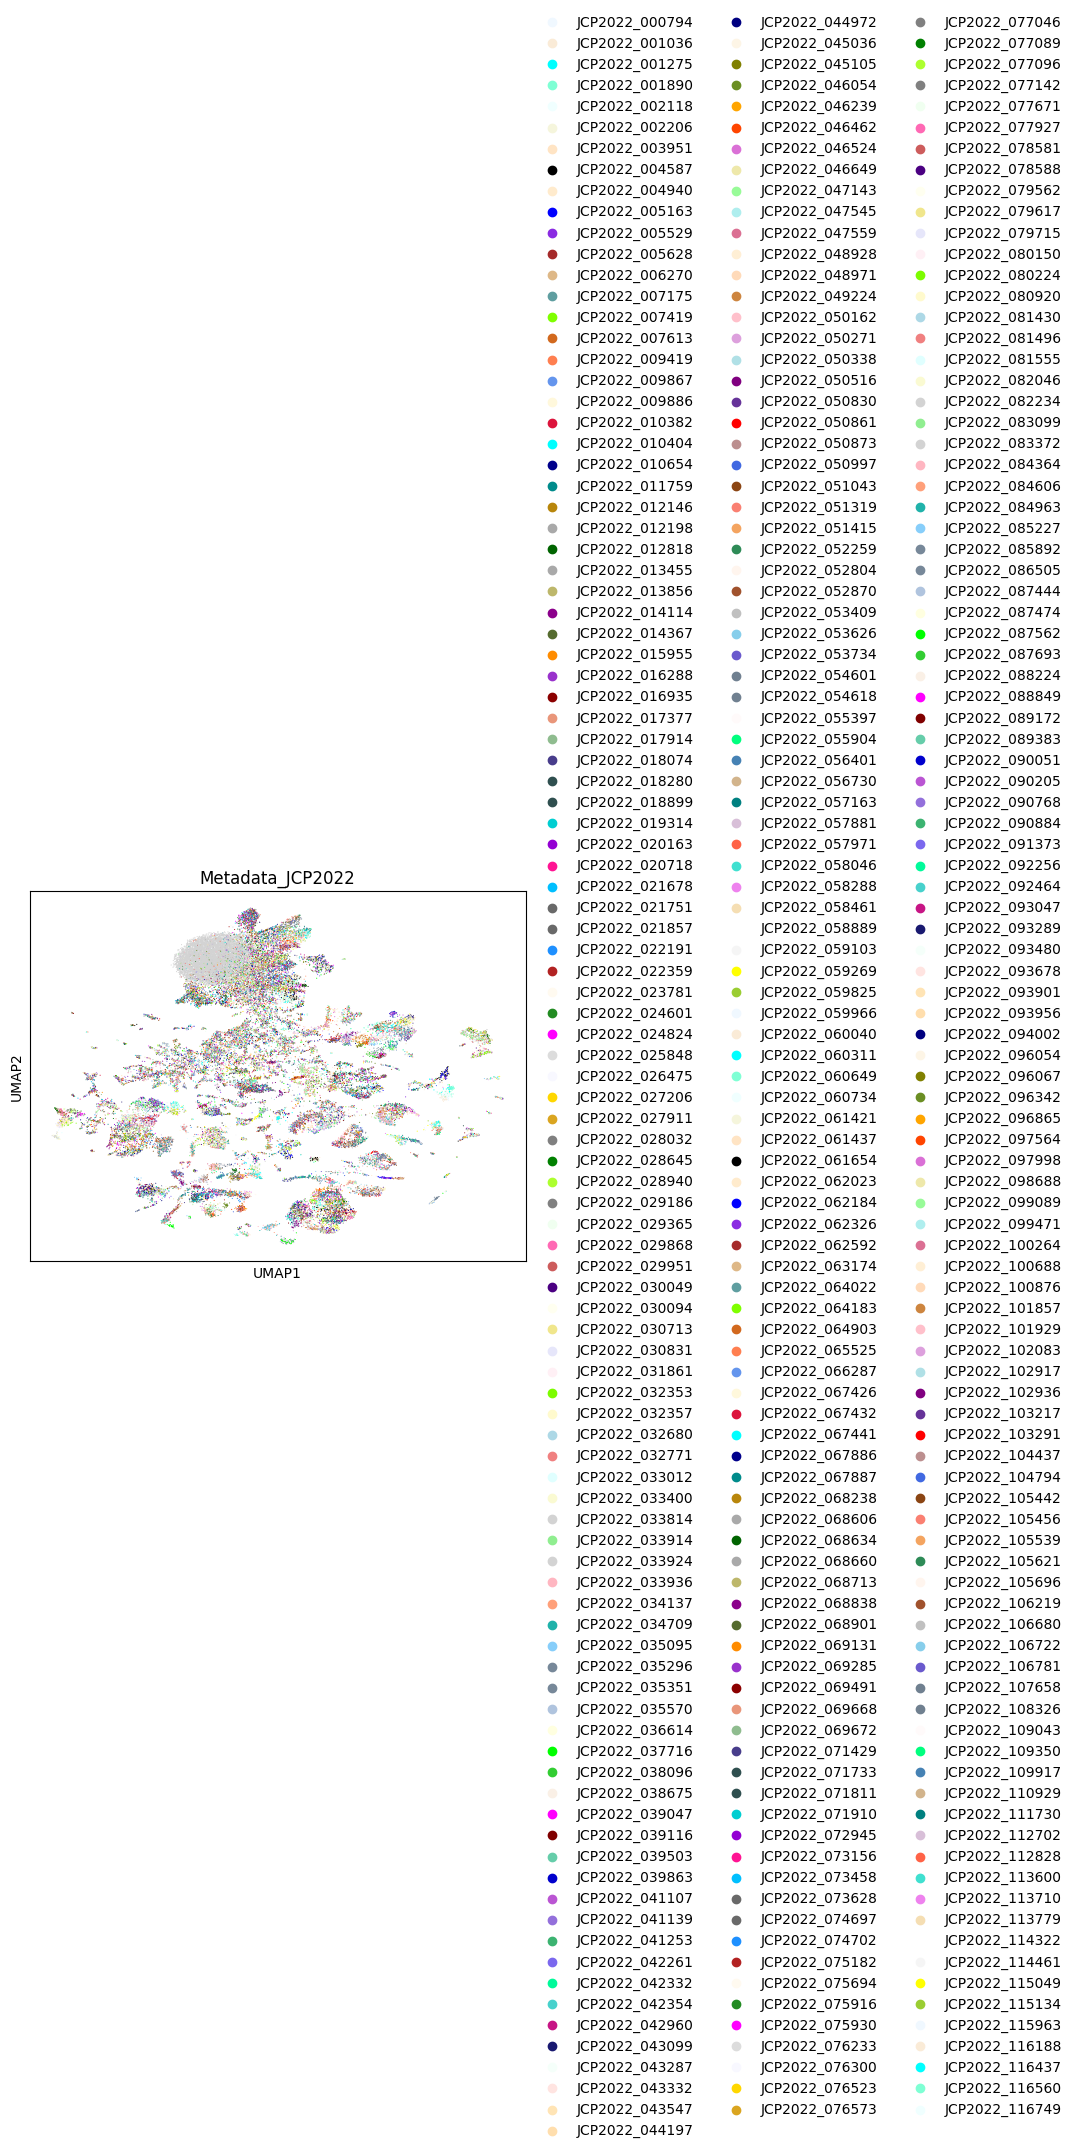

In [8]:
sc.pl.umap(target2_plate, color="Metadata_JCP2022",palette=list(matplotlib.colors.CSS4_COLORS.values()))

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


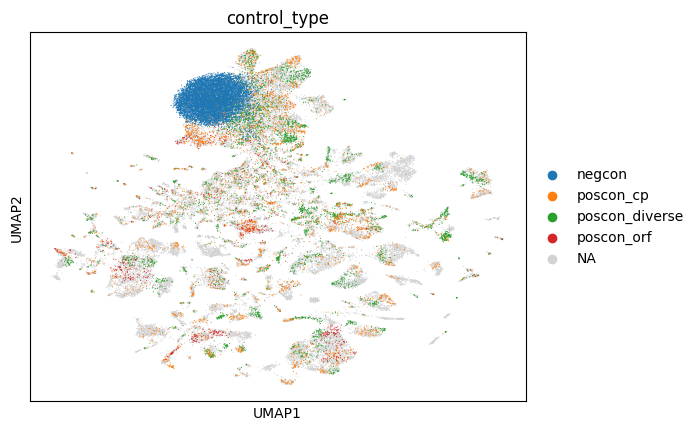

In [9]:
sc.pl.umap(target2_plate, color="control_type")

In [10]:
target2_plate.obsm["unintegrated"] = target2_plate.X
target2_plate

AnnData object with n_obs × n_vars = 50376 × 601
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'SMILES_original', 'SMILES_standardized', 'InChI_standardized', 'InChIKey_standardized', 'broad_sample', 'InChIKey', 'pert_iname', 'pubchem_cid', 'target', 'pert_type', 'control_type', 'moa', '_scvi_batch', '_scvi_labels'
    uns: 'Metadata_Source_colors', 'neighbors', 'umap', '_scvi_uuid', '_scvi_manager_uuid', 'Metadata_Plate_colors', 'Metadata_JCP2022_colors', 'control_type_colors'
    obsm: 'X_umap', 'X_scanvi', 'unintegrated'
    obsp: 'connectivities', 'distances'

In [11]:
tmp = sc.AnnData(X = target2_plate.obsm["X_scanvi"], obs = target2_plate.obs)
tmp

AnnData object with n_obs × n_vars = 50376 × 10
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'SMILES_original', 'SMILES_standardized', 'InChI_standardized', 'InChIKey_standardized', 'broad_sample', 'InChIKey', 'pert_iname', 'pubchem_cid', 'target', 'pert_type', 'control_type', 'moa', '_scvi_batch', '_scvi_labels'

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


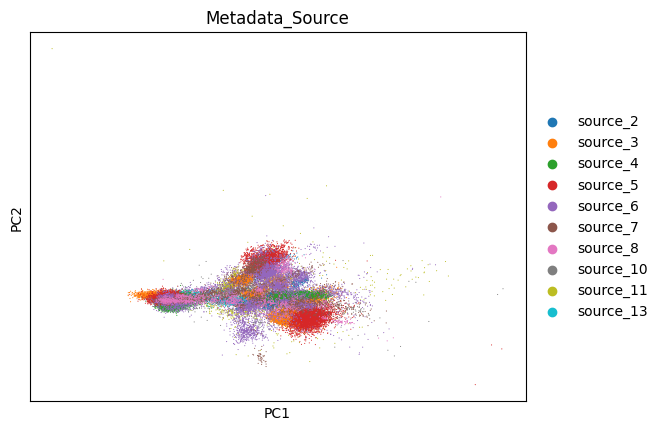

In [12]:
sc.tl.pca(tmp)
sc.pl.pca(tmp, color = "Metadata_Source")

In [13]:
target2_plate.write_h5ad("/vol/data/ouologuems/data/integrated/scanvi_normal/target2_direct_plate.h5ad")

## 2. Integration directly by source 

In [18]:
target2_source = target2.copy()
# min-max scaling because else you get exploding gradients
scaler = MinMaxScaler()
target2_source.X = scaler.fit_transform(target2_source.X)
#target2_source.layers["counts"] = target2_source.X

In [ ]:
scvi.model.SCANVI.setup_anndata(target2_source, batch_key="Metadata_Source", labels_key="Metadata_JCP2022", unlabeled_category="NA")
model = scvi.model.SCANVI(target2_source, gene_likelihood="normal")
model.train()
SCANVI_LATENT_KEY = "X_scanvi"
target2_source.obsm[SCANVI_LATENT_KEY] = model.get_latent_representation()

In [ ]:
sc.pp.neighbors(target2_source, use_rep="X_scanvi")
sc.tl.umap(target2_source)
sc.pl.umap(target2_source, color="Metadata_Source")
sc.pl.umap(target2_source, color="Metadata_Plate",palette=list(matplotlib.colors.CSS4_COLORS.values()))

In [ ]:
sc.pl.umap(target2_source, color="control_type")

In [22]:
target2_source.obsm["unintegrated"] = target2_source.X

In [ ]:
tmp = sc.AnnData(X = target2_source.obsm["X_scanvi"], obs = target2_source.obs)
tmp

In [ ]:
sc.tl.pca(tmp)
sc.pl.pca(tmp, color = "Metadata_Source")

In [25]:
target2_source.write_h5ad("/vol/data/ouologuems/data/integrated/scanvi_normal/target2_direct_source.h5ad")